# Student ID: 000997514
# Poorva suresh Araj

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv('companies_data.csv')


In [3]:
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = companies.iloc[:, :-1].values #every row except last column (Independent Variable)
y = companies.iloc[:, 4].values #only last column (Dependent variable)

<AxesSubplot:>

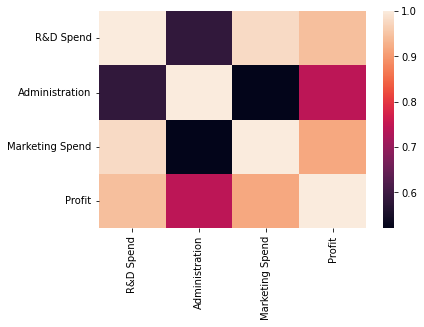

In [5]:
sns.heatmap(companies.corr())
#Building correlation matrix and 
#seaborn recognizes panda df and uses method .corr() to present heatmap of correlations.


In [6]:
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None


In [7]:
#state has dtype object 
companies['State']


0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [8]:
companies.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
#Transforms categorical data as lm cannot process categorical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder() # Encoding categorical data

X[:, 3] = labelencoder.fit_transform(X[:, 3]) #state


In [10]:
# = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('companies', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X) #toarray()

In [11]:
#avoiding dummy variables
X = X[:, 1:]


In [12]:
print(X)
#we can see 

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [0.0 0.0 100275.47 241926.31 227142.82]
 [0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 1.0 161181.72 270939.86 295442.17]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#20% of the data will be set aside for testing

In [14]:
len(y_test)

200

In [15]:
from sklearn.linear_model import LinearRegression
regressor_model = LinearRegression()
regressor_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor_model.predict(X_test)
y_pred


array([ 89790.61532916,  88427.07187362,  94894.67836972, 175680.86725609,
        83411.73042089, 110571.90200074, 132145.22936441,  91473.37719687,
       164597.05380605,  53222.82667402,  66950.19050991, 150566.43987004,
       126915.20858596,  59337.85971051, 177513.9105306 ,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645083,
       118845.03252689,  85669.95112229, 180992.59396142,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346906, 210040.00765882, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214127,
       186014.72531986, 171442.64130746, 174644.26529203, 117671.49128195,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176915,
       116513.89532179,  58632.48986822, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [17]:
len(y_pred)

200

In [18]:
#printing coefficients
print(regressor_model.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [19]:
print(regressor_model.intercept_)

-51035.2297240225


In [25]:
#r squared value to predict how good model is
from sklearn.metrics import r2_score
#y test actual values and y pred predicted values
r2_score(y_test,y_pred)

0.9112695892268747

In [21]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('mean squared error is: ', mean_squared_error(y_pred, y_test))
#msle = mean_squared_log_error(y_test, y_pred)
print( 'mean squared log error is: ', mean_squared_log_error(y_test, y_pred))

mean squared error is:  192148061.81509155
mean squared log error is:  0.0028183216074723805


In [22]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [23]:
X_test[:,3]

array([117368.4374, 117133.7666, 118246.8651, 132302.0043, 116390.7656,
       121065.1295, 127864.55, 117658.0468, 130363.0537, 111226.5321,
       113437.5176, 127979.7204, 123757.7143, 112127.4079, 132465.9341,
       114997.5096, 122417.6247, 130238.9987, 156547.42, 133370.059,
       152701.92, 116659.2562, 133216.1717, 116396.8207, 119987.0323,
       119337.8109, 124153.04, 111824.8023, 113772.4662, 151377.59,
       122853.1464, 121143.4023, 119501.7408, 125809.9389, 112924.6091,
       120649.9882, 134049.1125, 131572.5902, 132123.6013, 122318.3806,
       118683.1253, 130390.08, 120454.8969, 110705.3533, 122119.1542,
       112006.0112, 129330.7387, 115583.9649, 129556.4007, 124635.9944,
       133885.3304, 132117.5463, 118049.1155, 115518.0976, 133142.3294,
       116602.8407, 126660.4543, 131399.3563, 116554.8432, 120159.0848,
       126446.9024, 111075.4508, 126326.8348, 125988.0465, 118831.9913,
       121615.4022, 123850.1648, 128218.3786, 112166.1013, 132061.8692,
     

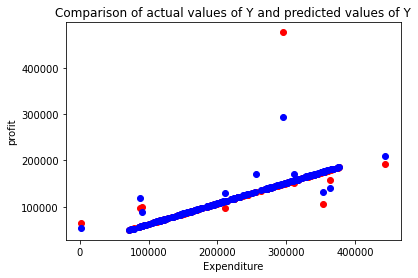

In [24]:
plt.scatter(X_test[:,4], y_test, color = "red")
plt.scatter(X_test[:,4], y_pred, color = "blue")
plt.title("Comparison of actual values of Y and predicted values of Y")
plt.xlabel("Expenditure")
plt.ylabel("profit")
plt.show()
#profits values of y tests and y predicted are overlapping, which concludes model is giving right predictions.